# Week 9 Assignment – Simulation Solutions

### Adeline Makokha
### 191199
### DSA 8302 Computational Techniques for Data Science
### Assignment 9

## Question 1: Estimating π with Random Sampling
Estimate π using Monte Carlo simulation by generating 100,000 random points in the unit square. Repeat the simulation 10 times and compare the estimates to the actual value of π.

In [7]:
import numpy as np
import math

np.random.seed(0)  # Seed for reproducibility

N = 100000  # number of random points per run
for run in range(1, 11):
    # Generate N random (x, y) points in the unit square
    points = np.random.rand(N, 2)  
    # Count how many points fall inside the quarter-circle (x^2 + y^2 <= 1)
    inside_count = np.sum(np.sum(points**2, axis=1) <= 1)
    # Monte Carlo estimate of π (area_ratio * 4)
    pi_estimate = 4 * inside_count / N
    error = pi_estimate - math.pi
    print(f"Run {run}: π estimate = {pi_estimate:.6f}, error = {error:.6f}")

Run 1: π estimate = 3.133040, error = -0.008553
Run 2: π estimate = 3.153680, error = 0.012087
Run 3: π estimate = 3.137720, error = -0.003873
Run 4: π estimate = 3.136080, error = -0.005513
Run 5: π estimate = 3.135840, error = -0.005753
Run 6: π estimate = 3.149280, error = 0.007687
Run 7: π estimate = 3.139840, error = -0.001753
Run 8: π estimate = 3.140840, error = -0.000753
Run 9: π estimate = 3.142360, error = 0.000767
Run 10: π estimate = 3.140680, error = -0.000913


### Explanation:
This simulates random points within a unit square and counts how many fall within a quarter circle of radius 1. The ratio of points inside the circle to total points approximates π/4, hence multiplying by 4 estimates π.

## Question 2: Estimating the Mean of a Normal Distribution
Simulate 1,000 samples, each of size 50, from a normal distribution with mean μ = 10 and standard deviation σ = 2. Plot the distribution of the sample means and compute their overall average and standard deviation.

In [8]:
import matplotlib.pyplot as plt

np.random.seed(0)
mu, sigma = 10, 2
num_samples = 1000
sample_size = 50
means = []

for _ in range(num_samples):
    sample = np.random.normal(mu, sigma, sample_size)
    means.append(sample.mean())

means = np.array(means)
avg_of_means = means.mean()
std_of_means = means.std()
print(f"Average of sample means = {avg_of_means:.3f}")
print(f"Standard deviation of sample means = {std_of_means:.3f}")



Average of sample means = 9.992
Standard deviation of sample means = 0.290


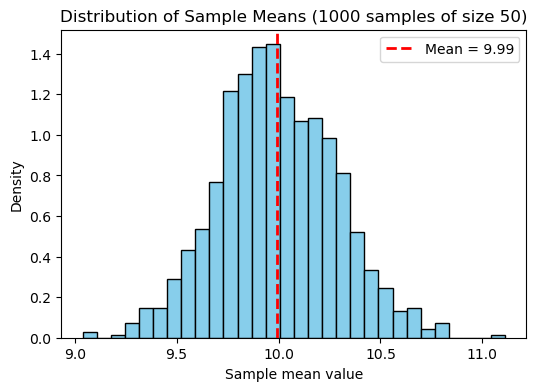

In [9]:
plt.figure(figsize=(6,4))
plt.hist(means, bins=30, color='skyblue', edgecolor='black', density=True)
plt.axvline(avg_of_means, color='red', linestyle='--', linewidth=2, label=f"Mean = {avg_of_means:.2f}")
plt.title("Distribution of Sample Means (1000 samples of size 50)")
plt.xlabel("Sample mean value")
plt.ylabel("Density")
plt.legend()
plt.show()

### Explanation:
This generates multiple samples from a normal distribution and calculates the mean for each sample. The distribution of these sample means is then plotted. The distribution of sample means should be approximately normal.

## Question 3: Estimating Dice Probability
Use simulation to estimate the probability that the sum of two fair six-sided dice is greater than 9. Compare the result to the theoretical probability.

In [10]:
np.random.seed(0)

trials = 100000
die1 = np.random.randint(1, 7, size=trials)
die2 = np.random.randint(1, 7, size=trials)
sums = die1 + die2
estimated_prob = np.mean(sums > 9)
print(f"Estimated P(sum > 9) from {trials} simulations: {estimated_prob:.5f}")

# Theoretical probability
favorable = sum(1 for a in range(1, 7) for b in range(1, 7) if a + b > 9)
theoretical_prob = favorable / 36
print(f"Theoretical P(sum > 9): {theoretical_prob:.5f}")
print(f"Absolute difference: {abs(estimated_prob - theoretical_prob):.5f}")

Estimated P(sum > 9) from 100000 simulations: 0.16810
Theoretical P(sum > 9): 0.16667
Absolute difference: 0.00143


### Explanation:
This simulates rolling two dice 100,000 times and estimates the probability that the sum is greater than 9. It also calculates the theoretical probability by counting favorable outcomes.